# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


**Penjelasan Dataset**

Dataset yang digunakan adalah data pasien penyakit liver dan diperoleh dari sumber open-source yakni kaggle. <br>
URL dataset: https://www.kaggle.com/datasets/ahmadreginald/data-pasien-penyakit-liver <br>
Berikut detail feature dari dataset: <br>

- `Age`: Usia pasien (dalam tahun).
- `Gender`: Jenis kelamin pasien (telah dinumerisasi: misal, 0 untuk Pria, 1 untuk Wanita).
- `Total_Bilirubin`: Kadar bilirubin total dalam darah. Bilirubin adalah pigmen kuning yang diproduksi saat sel d`arah merah pecah.
- `Direct_Bilirubin`: Kadar bilirubin terkonjugasi (langsung) dalam darah.
- `Alkaline_Phosphotase`: Kadar enzim fosfatase alkali. Tingkat yang tinggi sering dikaitkan dengan penyakit hati atau saluran empedu.
- `Alamine_Aminotransferase`: Kadar enzim alanin aminotransferase (ALT), sebelumnya dikenal sebagai SGPT.
- `Aspartate_Aminotransferase`: Kadar enzim aspartat aminotransferase (AST), sebelumnya dikenal sebagai SGOT.
- `Total_Protiens`: Kadar total protein dalam darah.
- `Albumin`: Kadar albumin, sejenis protein yang dibuat di hati.
- `Albumin_and_Globulin_Ratio`: Rasio antara albumin dan globulin.
- `Dataset (Target)`: Variabel target. Digunakan untuk membagi data menjadi dua kelompok:
    1: Pasien dengan penyakit hati.
    2: Pasien tanpa penyakit hati.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Data Loading
df = pd.read_csv('/Eksperimen_SML_Mayang-Gumelar/Data Pasien penyakit liver.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
# Lihat info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         579 non-null    int64  
 1   Gender                      579 non-null    int64  
 2   Total_Bilirubin             579 non-null    float64
 3   Direct_Bilirubin            579 non-null    float64
 4   Alkaline_Phosphotase        579 non-null    int64  
 5   Alamine_Aminotransferase    579 non-null    int64  
 6   Aspartate_Aminotransferase  579 non-null    int64  
 7   Total_Protiens              579 non-null    float64
 8   Albumin                     579 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     579 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 49.9 KB


In [4]:
# Lihat dimensi dataset
df.shape

(579, 11)

**Penjelasan :**
- Dataset berjumlah 579 baris dengan dimensi `[579,11]`
- Semua feature bertipe data numeric : `int64 dan float64`
- Tahap awal dilihat dari info dataframe, data tidak memiliki `missing values`

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
# Statistik deskriptif dataset
df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,0.758204,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,1.284974
std,16.221786,0.428542,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


**Penjelasan :**
- Feature Alkaline_Phosphotase, Alamine_Aminotransferase, Aspartate_Aminotransferase memiliki rentang sangat jauh antara nilai minimal dan maksimal (butuh normalisasi)
- Feature Gender terindikasi skew, karena dari IQR 25% - 75% masih bernilai [1]
- Butuh pemeriksaan outliers

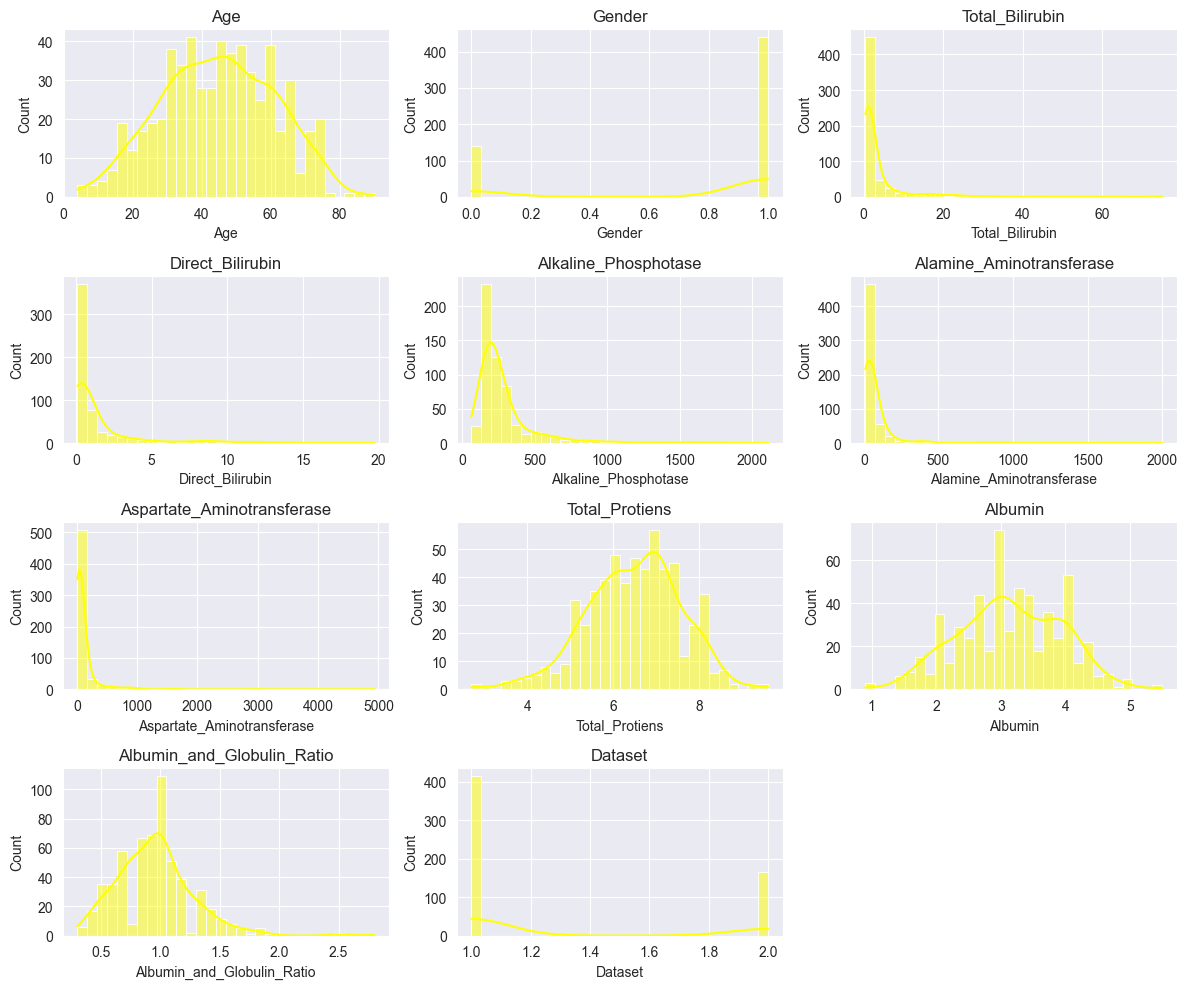

In [6]:
# Menampilkan histogram untuk kolom numerik
num_vars = df.shape[1]
n_cols = 11

plt.figure(figsize=(12,10))
for i, col in enumerate(df.select_dtypes(include='number'),1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color='yellow')
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

**Penjelasan :**
- `Age` memiliki distribusi yang hampir merata
- `Gender` didominasi 1 (Pria)
- `Total_Bilirubin, Direct_Bilirubin, Alkaline_Phosphotase, Alamine_Aminotransfearse, Aspartate_Aminotransferase, Albumin_and_Globulin_Ratio` cenderung right skew yang berarti rata-rata bernilai minimum
- `Target` mayor di kelas (1) berarti banyak pasien terkena liver

**Value Count tiap feature**

In [7]:
# Value tiap kelas pada target (feature Dataset)
df.Dataset.value_counts()

Dataset
1    414
2    165
Name: count, dtype: int64

In [8]:
# Value count untuk Gender
df.Gender.value_counts()

Gender
1    439
0    140
Name: count, dtype: int64

Berdasarkan filter target (yes) -> dominan laki-laki yang terkena penyakit liver <br>
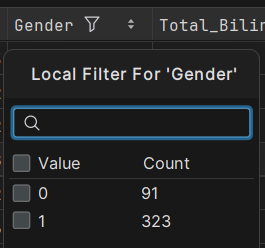

**Korelasi Antar Feature**

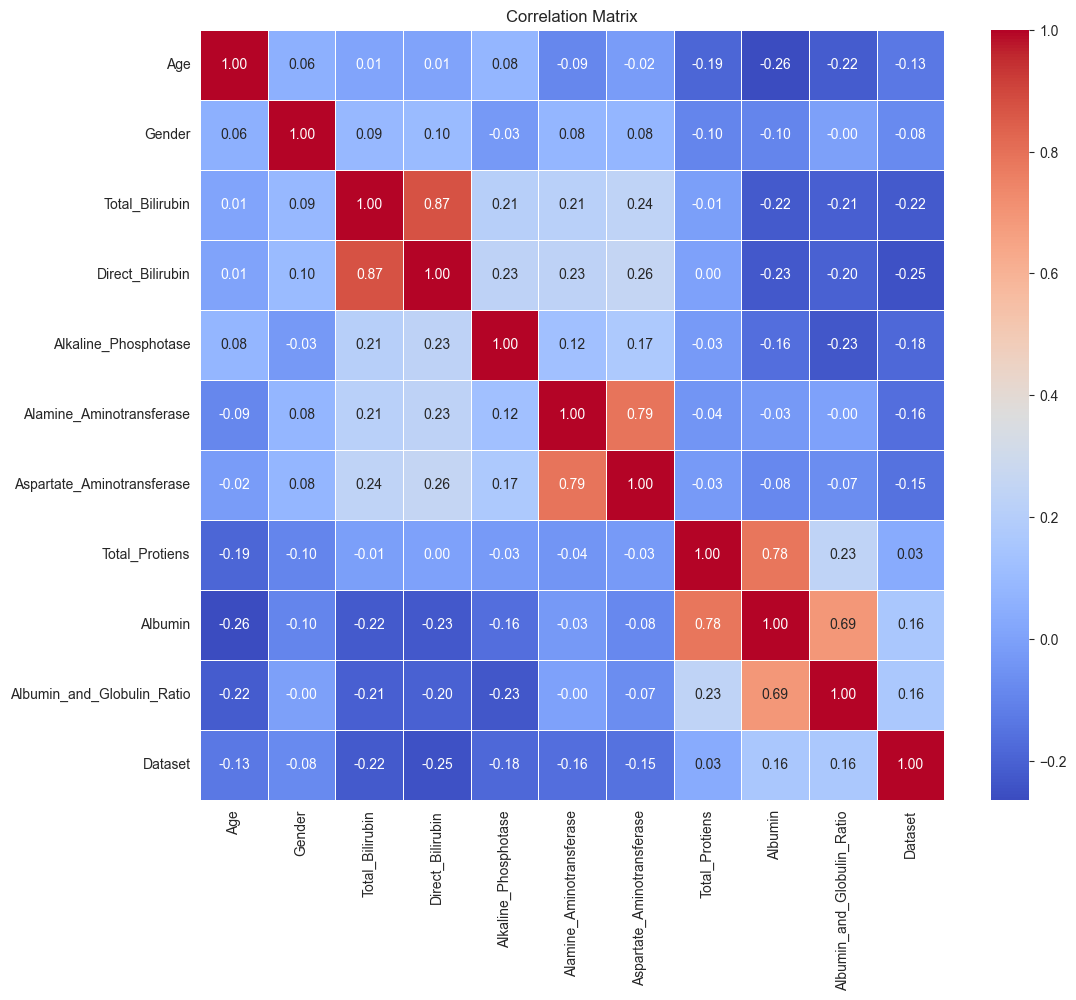

In [9]:
plt.figure(figsize=(12,10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

**Penjelasan :**
- `Total_Bilirubin dan Direct Bilirubin` berkorelasi tinggi = 0.87
- `Alamine_Aminotransferase dan Aspartate_Aminotransferase` berkorelasi tinggi = 0.79
- `Total_Proteins dan Albumin` berkorelasi tinggi = 0.78
- `Albumin dan Albumin_and_Globulin_Ratio` berkorelasi tinggi = 0.69
<br>
Namun, treshold masih di bawah 0.80, sehingga belum perlu drop salah satu feature diantaranya

**Missing Values dan Duplicated**

In [10]:
# Cek Missing Values
miss = df.isnull().sum()
print("Jumlah missing values:\n", miss)

# Cek duplikasi
duplicated = df.duplicated()
print("Jumlah duplikasi :", duplicated)

Jumlah missing values:
 Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64
Jumlah duplikasi : 0      False
1      False
2      False
3      False
4      False
       ...  
574    False
575    False
576    False
577    False
578    False
Length: 579, dtype: bool


**Penjelasan :**
- Missing values 0
- Dupliaksi data 0

Data terbilang bersih

**Boxplot Visualization**

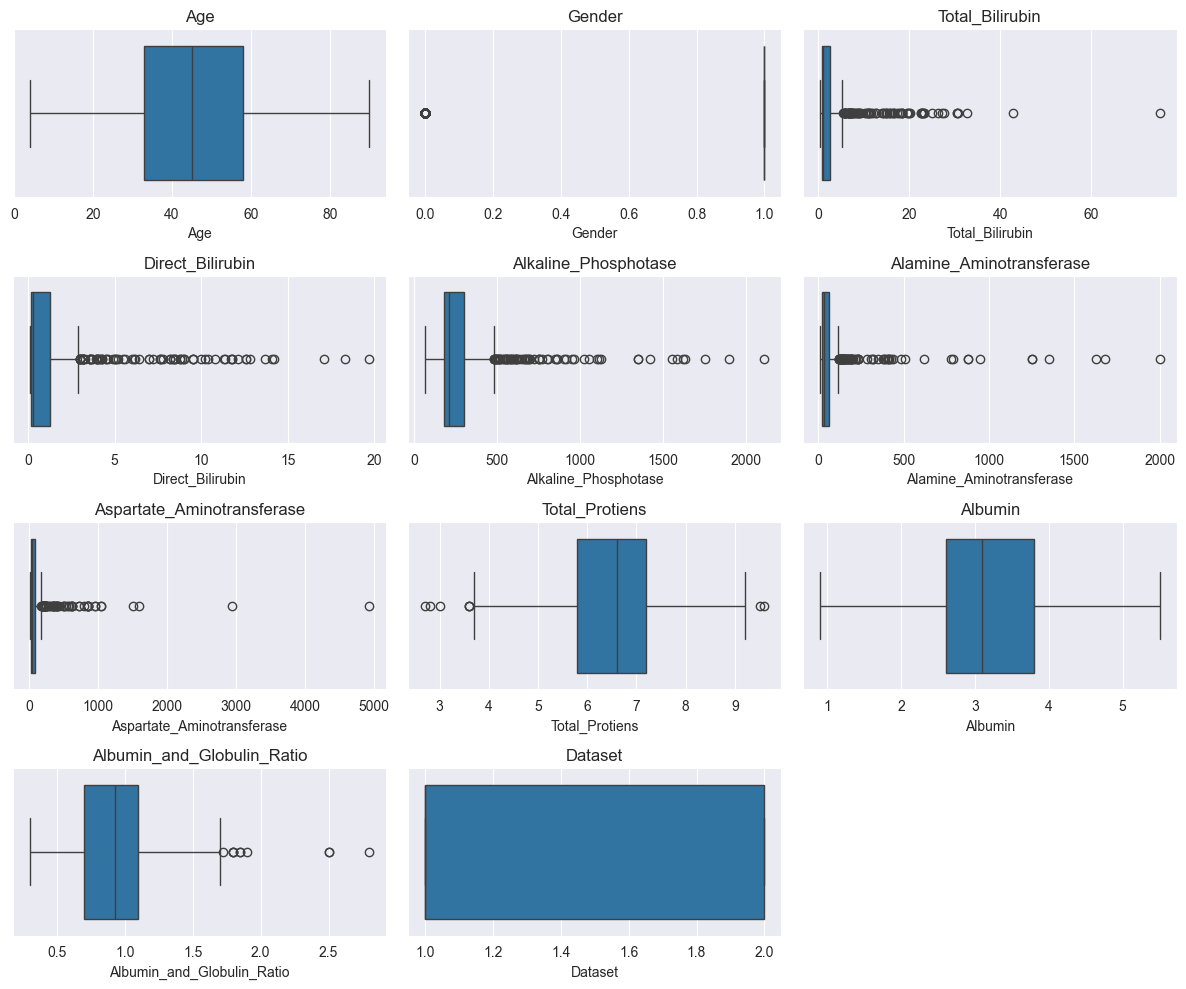

In [11]:
# Periksa outliers dengan boxplot
plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

**Penjelasan :**
- Outlier di `Total_Bilirubin` : penyakit liver >1.2 mg/dL
- Outlier di `Direct_Bilirubin` : penyakit liver >2 mg/dL
- Outlier di `Alkaline_Phosphotase` : penyakit liver >150 IU/L, obstruksi bilier >400 IU/L
- Outlier di `Alanine_Aminotransferase` : penyakit liver >55 U/L, akut >1000 U/L
- Outlier di `Aspartate Aminotransferase` : penyakit liver >40 U/L, akut >1000 U/L
- Outiler di `Albumin_and_Globulin_Ratio` : penyakit liver <1.0 akibat penurunan albumin dan peningkatan globulin. Sehingga outlier tidak valid (butuh handling di feature ini)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kamu menggunakan data tidak terstruktur.

### **Outlier Handling**

In [12]:
# Melakukan handling outliers untuk feature Albumin_and_Globulin_Ratio

Q1 = df['Albumin_and_Globulin_Ratio'].quantile(0.25)
Q3 = df['Albumin_and_Globulin_Ratio'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan lower dan upper bound
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

print(f"\nBatas Bawah: {batas_bawah}")
print(f"Batas Atas: {batas_atas}")


Batas Bawah: 0.09999999999999976
Batas Atas: 1.7000000000000002


In [13]:
condition = ~((df['Albumin_and_Globulin_Ratio'] < (Q1 - 1.5 * IQR)) | (df['Albumin_and_Globulin_Ratio'] > (Q3 + 1.5 * IQR)))
df_cleaned = df.loc[condition]

In [14]:
df_cleaned.shape

(569, 11)

**Penjelasan :**
Tersisa 569 baris setelah pembersihan outlier

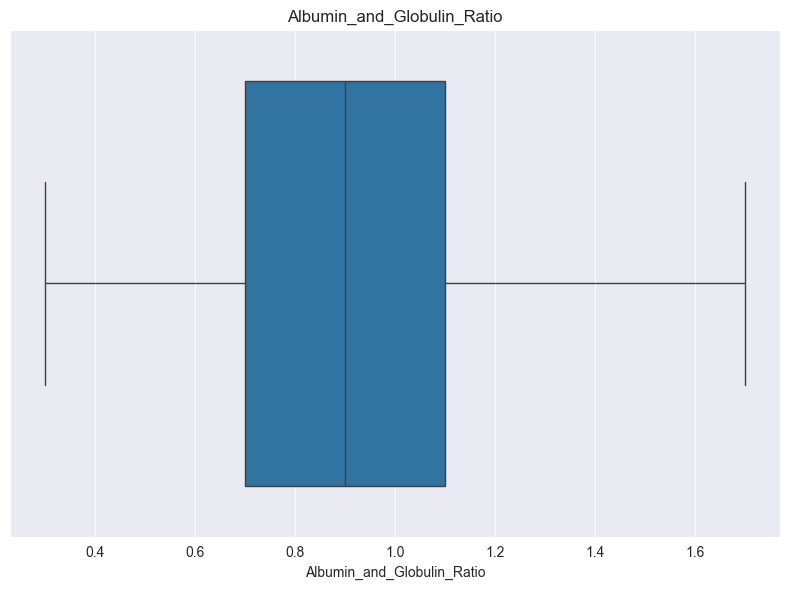

In [17]:
# Periksa outliers dengan boxplot after cleaning
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned['Albumin_and_Globulin_Ratio'])
plt.title("Albumin_and_Globulin_Ratio")
plt.tight_layout()
plt.show()

**Kolom Albumin_and_Globulin_Ratio telah bersih**

In [19]:
# Ubah nama kolom target
df_cleaned = df_cleaned.rename(columns={'Dataset': 'Target'})
df_cleaned.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [20]:
# Save hasil cleaning
df_cleaned.to_csv('Data_Liver_Cleaned.csv')

### **Normalisasi Data dengan Robust Scalling**

`Robust Scalling` digunakan karena Scaller ini dibuat untuk normalisasi data yang memiliki outliers extreme. Karena data ini memiliki outliers extreme namun relevan dengan medis, maka menghindari langkah drop dan mengganti dengan Robust Scalling

In [24]:
# Split data
X = df_cleaned.drop(columns=['Target'])
y = df_cleaned['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cek dimensi
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (455, 10)
X_test shape:  (114, 10)


In [25]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train
X_train_final = pd.DataFrame(
    X_train_scaled,
    columns=X_train.columns,
    index=X_train.index
)

# Test
X_test_final = pd.DataFrame(
    X_test_scaled,
    columns=X_test.columns,
    index=X_test.index
)

In [27]:
X_train_final.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
69,0.625000,0.0,-0.111111,-0.090909,0.056911,-0.300,-0.387597,-0.142857,-0.090909,0.00
182,0.833333,0.0,0.500000,0.454545,-0.308943,0.000,0.015504,-1.928571,-1.545455,-0.80
64,0.500000,0.0,0.166667,0.090909,0.414634,0.100,0.682171,0.000000,-0.545455,-0.75
252,-0.291667,0.0,0.388889,0.363636,5.292683,1.325,0.093023,-0.357143,-0.090909,0.25
61,0.541667,0.0,0.000000,0.181818,-0.406504,0.025,0.015504,0.500000,0.454545,0.25


**Join dengan y (label)**

In [37]:
# Gabungkan data train
combined_train = pd.concat([X_train_final, y_train], axis=1)
combined_train.to_csv('train_data_liver.csv')

combined_test = pd.concat([X_test_final, y_test], axis=1)
combined_test.to_csv('test_data_liver.csv')

In [30]:
print('Data train kombinasi : ', combined_train.shape)
print('Data test kombinasi : ', combined_test.shape)

# Hasilnya akan kembali dengan jumlah kolom 11

Data train kombinasi :  (455, 11)
Data test kombinasi :  (114, 11)


**Percobaan inference (data training)**

In [35]:
train_df_inf = scaler.inverse_transform(X_train_final)
train_df_inf = pd.DataFrame(
    train_df_inf,
    columns=X_train.columns,
    index=X_train.index
)

In [33]:
train_df_inf.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
69,60.0,1.0,0.8,0.2,215.0,24.0,17.0,6.3,3.0,0.90
182,65.0,1.0,1.9,0.8,170.0,36.0,43.0,3.8,1.4,0.58
64,57.0,1.0,1.3,0.4,259.0,40.0,86.0,6.5,2.5,0.60
252,38.0,1.0,1.7,0.7,859.0,89.0,48.0,6.0,3.0,1.00
61,58.0,1.0,1.0,0.5,158.0,37.0,43.0,7.2,3.6,1.00


End code